# Machine Learning in Time Series Forecasting	

# Overview of the Section

**1. Overview of the section**

**1 What we have done so far**

**2. Overview of Applied Machine Learning in Time Series Forecasting**

**3. Dataset Preparation**

**4. Univariate-time-series-forecasting**

    1. Autoregression (AR) in Time Series Forecasting
    2. Moving Average (MA) in Time Series Forecasting
    3. Autoregressive Moving Average (ARMA) in Time Series Forecasting
    4. Autoregressive integrated moving average (ARIMA) in Time Series Forecasting
    5. Auto ARIMA in Time Series Forecasting
    6. Seasonal Autoregressive Integrated Moving-Average (SARIMA) in Time Series Forecasting
    7. Auto - SARIMA in Time Series Forecasting    


# 1-Overview of this section


# What we have done So Far

# 2. Overview of Applied Machine Learning in Time Series Forecasting



**ML Methods For Time-Series Forecasting**


# 3. Preparaing Data to Apply Forecasting

# A- First things First
**Import Libraries**



In [4]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# B- Overview of the Dataset


In [47]:
df = pd.read_csv('air_pollution.csv', parse_dates=['date'])

In [48]:
df.columns

Index(['date', 'pollution_today', 'dew'], dtype='object')

In [49]:
# df.drop(['dew', 'temp', 'temp', 'press', 'wnd_spd','pollution_yesterday','snow','rain'], axis=1, inplace=True)
df.drop(['dew'], axis=1, inplace=True)

In [50]:
df.set_index('date', inplace=True)

In [51]:
df = df.loc[df.index<='2010-12-31']

In [52]:
df

,pollution_today
date,
2010-01-02,145.958333
2010-01-03,78.833333
2010-01-04,31.333333
2010-01-05,42.458333
2010-01-06,56.416667
...,...
2010-12-27,79.708333
2010-12-28,28.166667
2010-12-29,36.625000


<Axes: xlabel='date'>

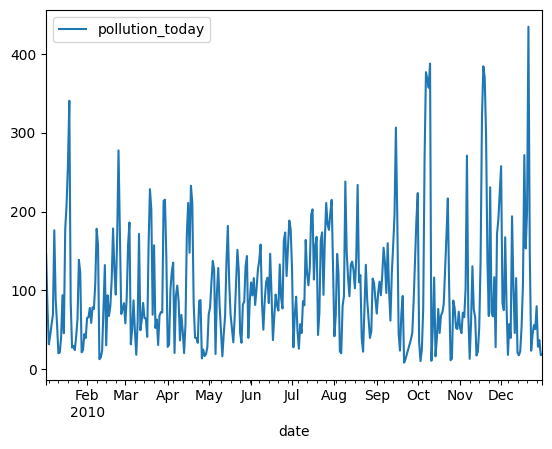

In [11]:
df.plot()

# C- Compute the Difference

In [50]:
df['pollution_today'].shift(1)

date
2010-01-02           NaN
2010-01-03    145.958333
2010-01-04     78.833333
2010-01-05     31.333333
2010-01-06     42.458333
                 ...    
2010-12-27     50.625000
2010-12-28     79.708333
2010-12-29     28.166667
2010-12-30     36.625000
2010-12-31     17.583333
Name: pollution_today, Length: 364, dtype: float64

In [51]:
df['Pollution_today First Difference']= df['pollution_today']-df['pollution_today'].shift(1)

<Axes: xlabel='date'>

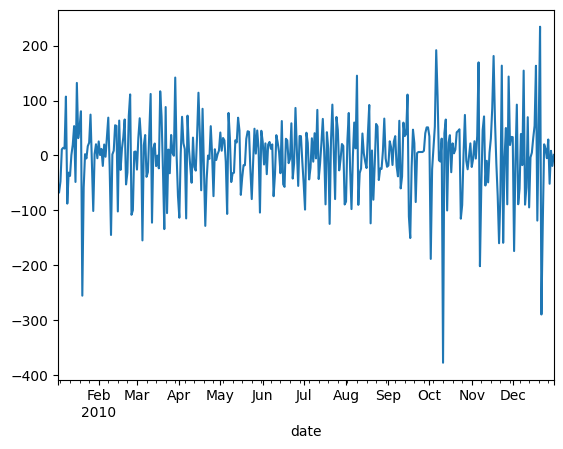

In [52]:
df['Pollution_today First Difference'].plot()

In [53]:
df['Pollution_today Seasonal First Difference']= df['pollution_today']-df['pollution_today'].shift(12)

<Axes: xlabel='date'>

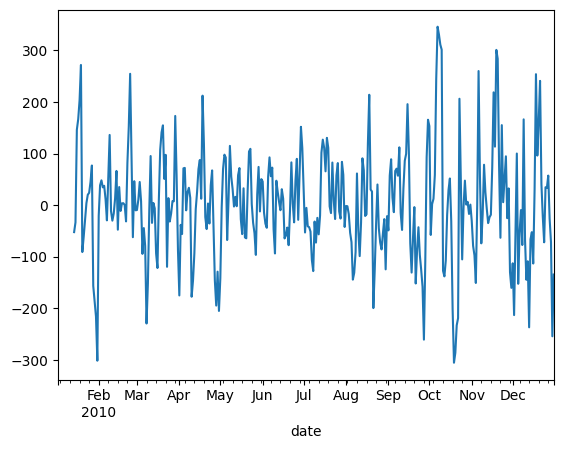

In [54]:
df['Pollution_today Seasonal First Difference'].plot()

In [55]:
df.head(14)

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference
date,,,
2010-01-02,145.958333,NaN,NaN
2010-01-03,78.833333,-67.125000,NaN
2010-01-04,31.333333,-47.500000,NaN
2010-01-05,42.458333,11.125000,NaN
2010-01-06,56.416667,13.958333,NaN
2010-01-07,69.000000,12.583333,NaN
2010-01-08,176.208333,107.208333,NaN
2010-01-09,88.500000,-87.708333,NaN
2010-01-10,57.250000,-31.250000,NaN


# Revision of Stationary Check

In [56]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['pollution_today'])
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -9.511801
p value 0.000000
critical values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [57]:
result=adfuller(df['Pollution_today First Difference'].dropna())
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -8.996160
p value 0.000000
critical values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [58]:
result=adfuller(df['Pollution_today Seasonal First Difference'].dropna())
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -6.728681
p value 0.000000
critical values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


# D- Autocorrelation Check

In [59]:
import statsmodels.api as sm

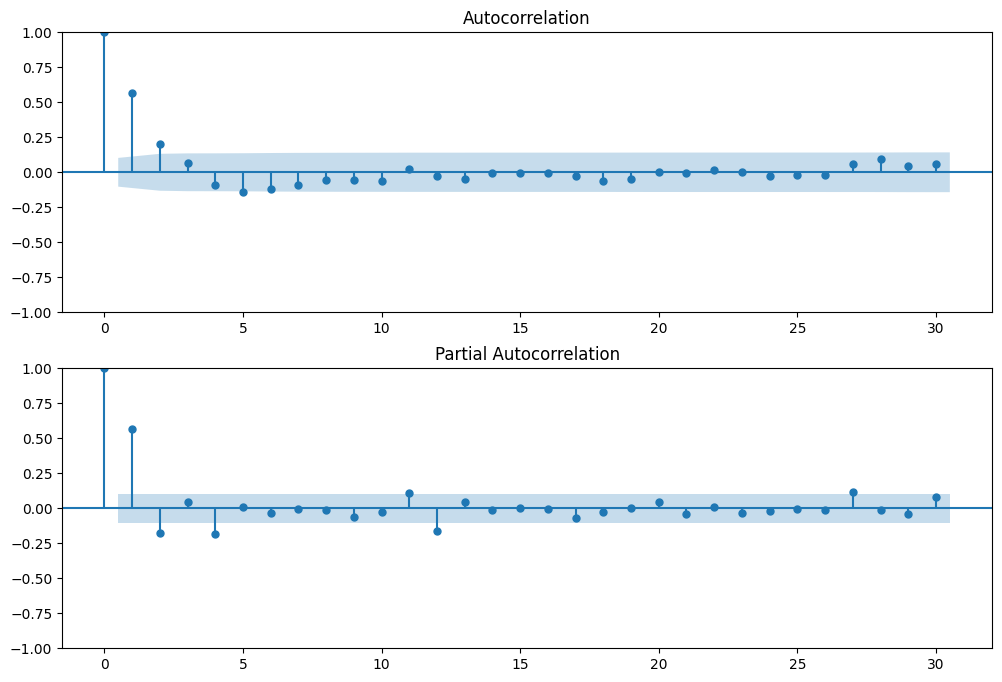

In [60]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df['pollution_today'], lags=30, ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['pollution_today'], lags=30, ax=ax2)

In [61]:
df['Pollution_today Seasonal First Difference']

date
2010-01-02           NaN
2010-01-03           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
                 ...    
2010-12-27     57.291667
2010-12-28    -26.041667
2010-12-29    -71.708333
2010-12-30   -254.166667
2010-12-31   -134.458333
Name: Pollution_today Seasonal First Difference, Length: 364, dtype: float64

In [62]:
df['Pollution_today Seasonal First Difference'].iloc[13:]

date
2010-01-15    -33.375000
2010-01-16    146.291667
2010-01-17    166.750000
2010-01-18    203.791667
2010-01-19    271.750000
                 ...    
2010-12-27     57.291667
2010-12-28    -26.041667
2010-12-29    -71.708333
2010-12-30   -254.166667
2010-12-31   -134.458333
Name: Pollution_today Seasonal First Difference, Length: 351, dtype: float64

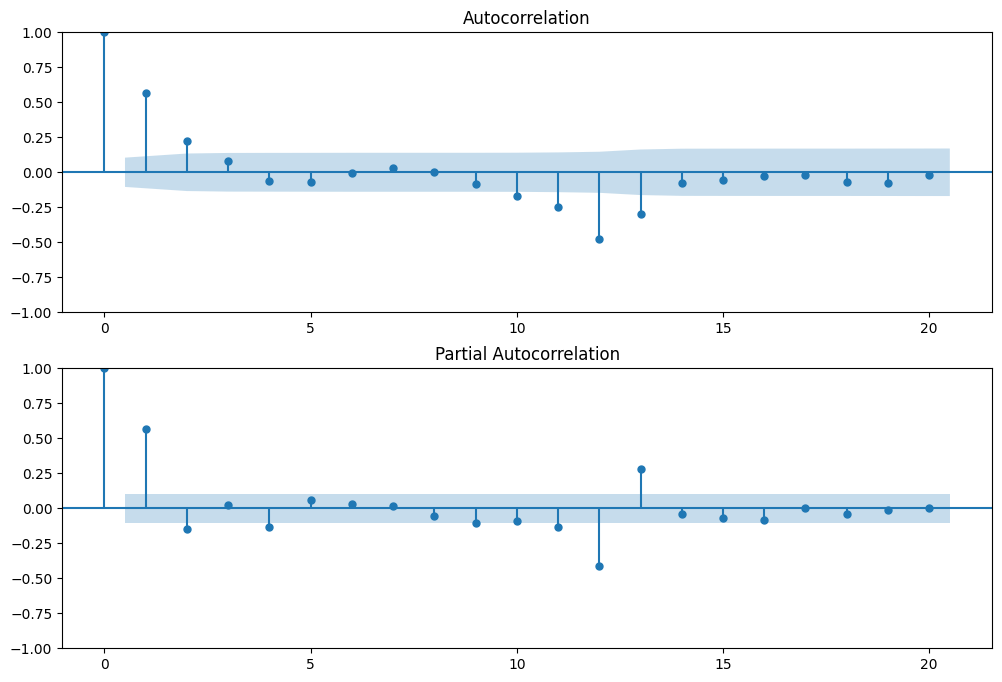

In [63]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df['Pollution_today Seasonal First Difference'].iloc[13:], lags=20, ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Pollution_today Seasonal First Difference'].iloc[13:], lags=20, ax=ax2)

# E- Auto-Correlation and Partial Correlation



# Data Splitting

**Prepare data before modeling**

In [12]:
resultsDict = {}
predictionsDict={}

split_date = '2010-10-01'

df_training = df.loc[df.index<=split_date]
df_test = df.loc[df.index>split_date]

print(f"{len(df_training)} days of training data\n {len(df_test)} days of testing data ")

273 days of training data
 91 days of testing data 


In [23]:
df_test.head()

,pollution_today
date,
2010-10-02,35.041667
2010-10-03,10.000000
2010-10-04,24.541667
2010-10-05,77.083333
2010-10-06,268.833333


# 4- Methods for time series forecasting



# A- Autoregression (AR)

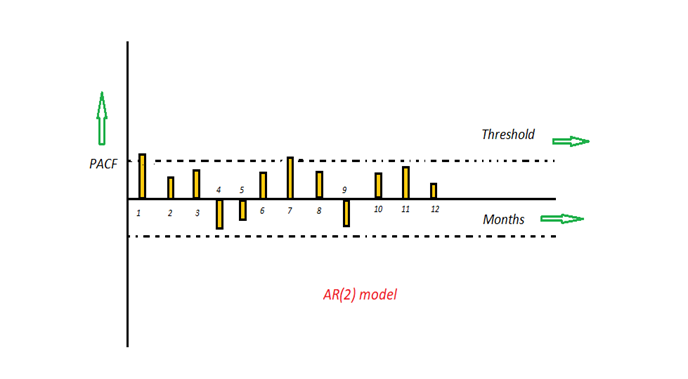

In [13]:
from statsmodels.tsa.ar_model import AutoReg
from tqdm import tqdm
from utils.metrics import evaluate

In [34]:
model = AutoReg(df_training.pollution_today, lags=50)
model_fit = model.fit()
predictions = model_fit.predict(start=len(df_training), end= len(df)-1, dynamic=False)
predictions

c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2010-10-02    166.398201
2010-10-03    140.307873
2010-10-04    143.734450
2010-10-05    164.110503
2010-10-06    120.921869
                 ...    
2010-12-27     97.712787
2010-12-28     94.354856
2010-12-29     88.813623
2010-12-30     92.453499
2010-12-31     94.381678
Freq: D, Length: 91, dtype: float64

In [35]:
evals = evaluate(df_test.pollution_today, predictions.values)
evals

{'mae': 81.00602609533304,
 'rmse': 108.72170022103774,
 'mape': 1.4780653724656059,
 'r2': -0.04815983114543565}

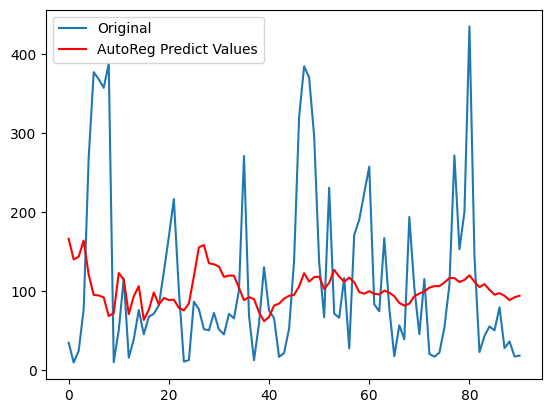

In [36]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(predictions.values, color='red', label='AutoReg Predict Values')
plt.legend()

In [ ]:
# index = len(df_training)

# y = list()

# for t in tqdm(range(len(df_test.pollution_today))):
#     temp_train = df[:len(df_training)+t]
    
#     model = AutoReg(temp_train.pollution_today, lags=50)
#     model_fit = model.fit()
#     predictions = model_fit.predict(start=len(temp_train), end= len(temp_train), dynamic=False)
    
#     y = y +[predictions]
    
# y = pd.concat(y)

# resultsDict['AutoReg']= evaluate(df_test.pollution_today, y.values)
# predictionsDict['AutoReg']= y.values

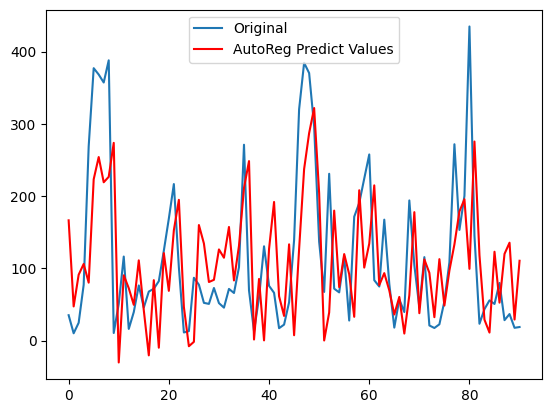

In [19]:
# plt.plot(df_test.pollution_today.values, label='Original')
# plt.plot(y.values, color='red', label='AutoReg Predict Values')
# plt.legend()

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                  273
Model:                    AutoReg(50)   Log Likelihood               -1145.519
Method:               Conditional MLE   S.D. of innovations             41.179
Date:                Mon, 24 Jun 2024   AIC                           2395.037
Time:                        13:00:44   BIC                           2572.210
Sample:                    02-21-2010   HQIC                          2466.561
                         - 10-01-2010                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  44.1904     23.247      1.901      0.057      -1.373      89.754
pollution_today.L1      0.6800      0.066     10.262      0.000       0.550       0.810
pollution_today.L2     -0.2674      0.080     -3.331      0.001      -0.425      -0.110
pollution_today.L3      0.0569      0.082      0.693      0.488      -0.104       0.218
pollution_today.L4      0.0378      0.082      0.460      0.645      -0.123       0.199
pollution_today.L5     -0.0603      0.082     -0.736      0.462      -0.221       0.100
pollution_today.L6      0.0118      0.081      0.146      0.884      -0.147       0.170
pollution_today.L7      0.1035      0.080      1.288      0.198      -0.054       0.261
pollution_today.L8     -0.1705      0.080     -2.121      0.034      -0.328      -0.013
pollution_today.L9      0.0019      0.081      0.023      0.982      -0.157       0.161
pollution_today.L10    -0.0664      0.081     -0.820      0.412      -0.225       0.092
pollution_today.L11     0.1368      0.081      1.691      0.091      -0.022       0.295
pollution_today.L12    -0.2166      0.081     -2.680      0.007      -0.375      -0.058
pollution_today.L13    -0.0314      0.082     -0.384      0.701      -0.192       0.129
pollution_today.L14     0.0471      0.082      0.577      0.564      -0.113       0.207
pollution_today.L15     0.1052      0.081      1.301      0.193      -0.053       0.264
pollution_today.L16     0.0779      0.081      0.964      0.335      -0.080       0.236
pollution_today.L17    -0.1086      0.082     -1.319      0.187      -0.270       0.053
pollution_today.L18     0.0820      0.083      0.994      0.320      -0.080       0.244
pollution_today.L19     0.0307      0.082      0.373      0.709      -0.131       0.192
pollution_today.L20     0.0328      0.082      0.397      0.691      -0.129       0.194
pollution_today.L21    -0.1071      0.082     -1.300      0.194      -0.269       0.054
pollution_today.L22     0.0051      0.083      0.062      0.951      -0.157       0.167
pollution_today.L23     0.0399      0.082      0.484      0.629      -0.122       0.202
pollution_today.L24    -0.0080      0.083     -0.097      0.923      -0.170       0.154
pollution_today.L25    -0.0389      0.082     -0.474      0.635      -0.199       0.122
pollution_today.L26     0.0859      0.082      1.046      0.295      -0.075       0.247
pollution_today.L27     0.0697      0.082      0.851      0.395      -0.091       0.230
pollution_today.L28     0.1031      0.082      1.256      0.209      -0.058       0.264
pollution_today.L29    -0.0540      0.082     -0.659      0.510      -0.215       0.107
pollution_today.L30     0.0868      0.082      1.058      0.290      -0.074       0.248
pollution_today.L31    -0.0548      0.082     -0.668      0.504      -0.216       0.106
pollution_today.L32    -0.0637      0.081     -0.783      0.433      -0.223       0.096
pollution_today.L33     0.0792      0.078      1.013      0.311      -0.0

# B-Moving average

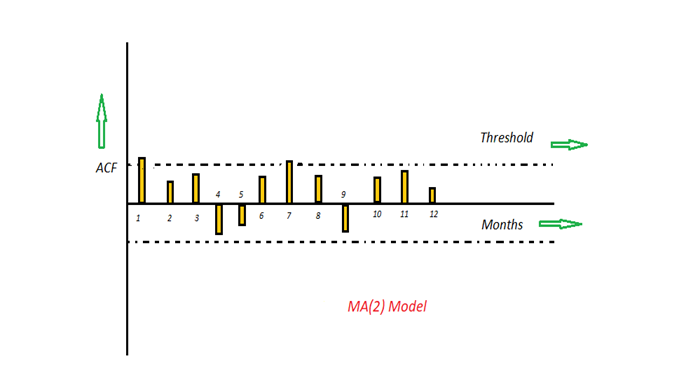

# C- ARMA





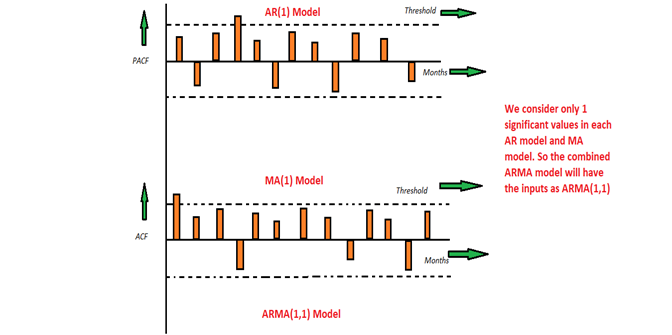




# D- Auto-Regressive Integrated Moving Average (ARIMA) Model



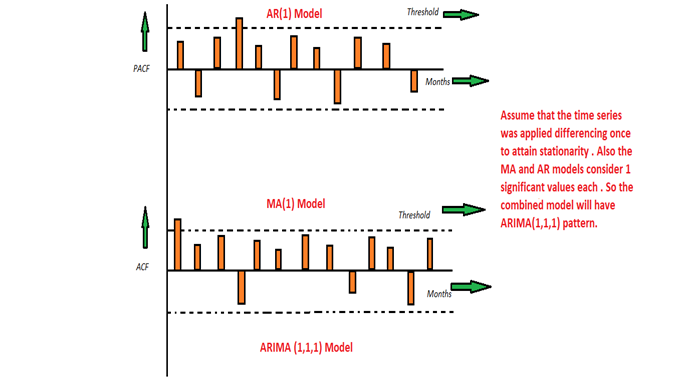


In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
model=ARIMA(df['pollution_today'], order=(1,1,1))
model_fit=model.fit()

c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2012.200
Date:                Mon, 24 Jun 2024   AIC                           4030.399
Time:                        13:15:30   BIC                           4042.082
Sample:                    01-02-2010   HQIC                          4035.043
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5736      0.036     15.980      0.000       0.503       0.644
ma.L1         -0.9989      0.042    -23.997      0.000      -1.080      -0.917
sigma2      3774.2265    207.888     18.155      0.000    3366.774    4181.679
===================================================================================
Ljung-Box (L1) (Q):                   3.63   Jarque-Bera (JB):                67.97
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# cose a caso che fa lui
df['forecast']=model_fit.predict(start=90, end=103, dynamic=True)

df[['pollution_today','forecast']].plot(figsize=(12,8))

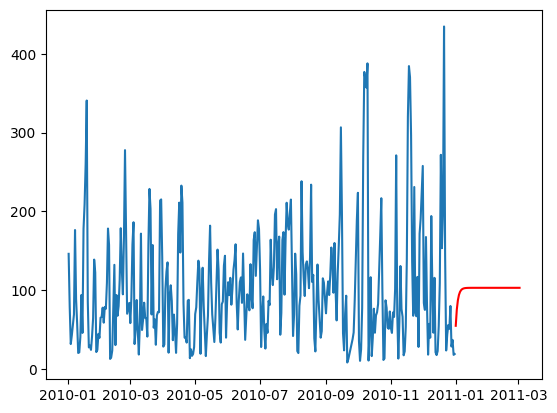

In [61]:
pred = model_fit.predict(start=len(df), end=len(df)+60, dynamic=True)
plt.plot(df.pollution_today, label='observed')
plt.plot(pred, color='red', label='pred')

c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: 

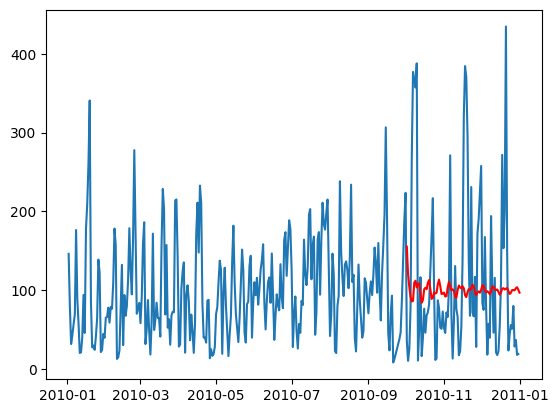

In [81]:
model=ARIMA(df_training['pollution_today'], order=(10,1,10))

model_fit=model.fit()

pred = model_fit.predict(start=len(df_training), end=len(df), dynamic=True)
plt.plot(df, label='observed')
plt.plot(pred, color='red', label='pred')

# E- Auto ARIMA

In [83]:
import pmdarima as pm

In [85]:
autoModel = pm.auto_arima(df_training.pollution_today, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True)
autoModel.fit(df_training.pollution_today)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2911.925, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3015.307, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2922.531, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2914.130, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3371.057, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2909.942, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2907.994, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2909.941, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2908.272, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2911.972, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3069.884, Time=0.05 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.897 seconds


ARIMA(order=(0, 0, 2), scoring_args={}, suppress_warnings=True)

c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


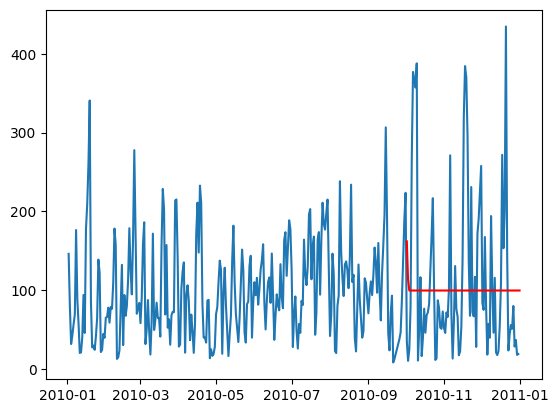

In [86]:
order = autoModel.order

model=ARIMA(df_training['pollution_today'], order=order)

model_fit=model.fit()

pred = model_fit.predict(start=len(df_training), end=len(df), dynamic=True)
plt.plot(df, label='observed')
plt.plot(pred, color='red', label='pred')

In [ ]:
order = autoModel.order

yhat = list()


for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    
    model = ARIMA(temp_train.pollution_today, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end= len(temp_train), dynamic=False)
    
    yhat = yhat +[predictions]
    
yhat = pd.concat(yhat)

resultsDict['AutoARIMA{0}'. format(order)]= evaluate(df_test.pollution_today, yhat)
predictionsDict['AutoARIMA{0}'. format(order)]= yhat.values

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                  363
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2003.576
Date:                Sat, 27 Aug 2022   AIC                           4015.153
Time:                        13:36:22   BIC                           4030.730
Sample:                    01-02-2010   HQIC                          4021.345
                         - 12-30-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.9924      7.098     14.510      0.000      89.080     116.905
ma.L1          0.6842      0.041     16.612      0.000       0.603       0.765
ma.L2          0.1270      0.043      2.966      0.003       0.043       0.211
sigma2      3640.0401    227.420     16.006      0.000    3194.306    4085.775
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                64.51
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

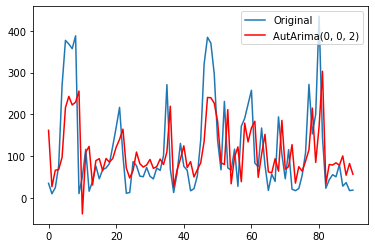

In [41]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='AutoArima{0}'.format(order))
plt.legend()


# SARIMA and SARIMAX


# F- Seasonal Autoregressive Integrated Moving-Average (SARIMA)


In [87]:
import statsmodels.api as sm

c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

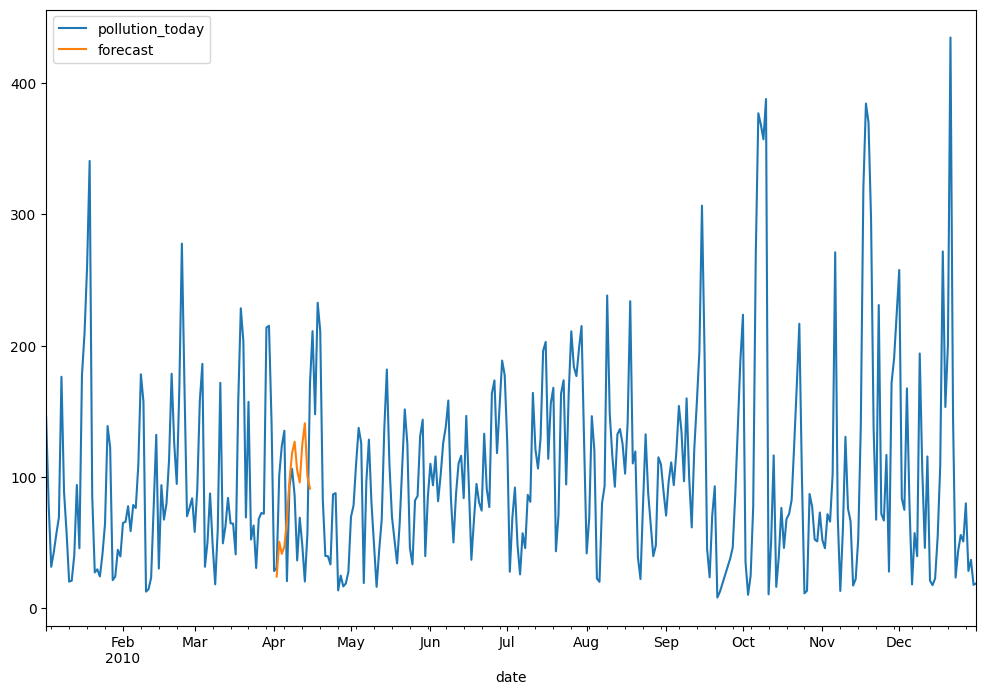

In [90]:
model = sm.tsa.statespace.SARIMAX(df['pollution_today'], order=(10,1,10), seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['pollution_today','forecast']].plot(figsize=(12,8))

c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\elisa\.conda\envs\saad\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


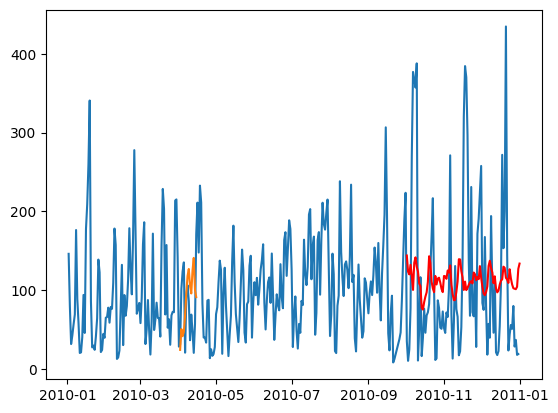

In [91]:
model = sm.tsa.statespace.SARIMAX(df_training['pollution_today'], order=(10,1,10), seasonal_order=(1,1,1,12))

model_fit=model.fit()

pred = model_fit.predict(start=len(df_training), end=len(df), dynamic=True)
plt.plot(df, label='observed')
plt.plot(pred, color='red', label='pred')

# FUTURE DF

In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
future_dates= [df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [51]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [53]:
future_datest_df.tail(3)

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference,forecast
2012-09-30,NaN,NaN,NaN,NaN
2012-10-31,NaN,NaN,NaN,NaN
2012-11-30,NaN,NaN,NaN,NaN


In [54]:
future_df= pd.concat([df,future_datest_df])

In [55]:
future_df

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference,forecast
2010-01-02,145.958333,NaN,NaN,NaN
2010-01-03,78.833333,-67.125000,NaN,NaN
2010-01-04,31.333333,-47.500000,NaN,NaN
2010-01-05,42.458333,11.125000,NaN,NaN
2010-01-06,56.416667,13.958333,NaN,NaN
...,...,...,...,...
2012-07-31,NaN,NaN,NaN,NaN
2012-08-31,NaN,NaN,NaN,NaN
2012-09-30,NaN,NaN,NaN,NaN
2012-10-31,NaN,NaN,NaN,NaN


<AxesSubplot:>

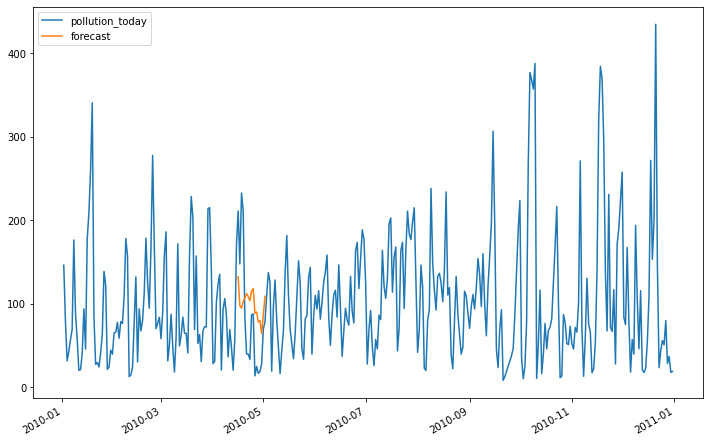

In [56]:
future_df['forecast']= results.predict(start=104, end=120, dynamic=True)

future_df[['pollution_today','forecast']].plot(figsize=(12,8))

# G -SARIMAX


# H- Auto SARIMA

In [57]:
autoModel = pm.auto_arima(df_training.pollution_today, trace=True, error_action='ignore',
                          suppress_warnings=True, seasonal=True, m=6, stepwise=True)
autoModel.fit(df_training.pollution_today)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=2911.861, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=3015.307, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=2922.708, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=2913.573, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=3371.057, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=2910.814, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=2911.925, Time=0.12 sec
 ARIMA(2,0,2)(0,0,2)[6] intercept   : AIC=2910.085, Time=0.54 sec
 ARIMA(2,0,2)(1,0,2)[6] intercept   : AIC=2909.373, Time=1.20 sec
 ARIMA(2,0,2)(2,0,2)[6] intercept   : AIC=2914.013, Time=1.21 sec
 ARIMA(2,0,2)(2,0,1)[6] intercept   : AIC=2908.915, Time=1.08 sec
 ARIMA(2,0,2)(2,0,0)[6] intercept   : AIC=2909.298, Time=0.65 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=2911.464, Time=0.28 sec
 ARIMA(1,0,2)(2,0,1)[6] intercept   : AIC=2911.319, Time=0.90 sec
 ARIMA(2,0,1)(2,0,1)[6] intercept

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(0, 0, 2, 6),
      suppress_warnings=True)

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
order = autoModel.order
seasonalOrder = autoModel.seasonal_order

yhat = list()

for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    model = SARIMAX(temp_train.pollution_today, order=order,
                    seasonal_order=seasonalOrder)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AutoSARIMAX {0},{1}'.format(order, seasonalOrder)] = evaluate(
    df_test.pollution_today, yhat.values)
predictionsDict['AutoSARIMAX {0},{1}'.format(
    order, seasonalOrder)] = yhat.values

  0%|                                                                                           | 0/91 [00:00<?, ?it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
  1%|▉                                                                                  | 1/91 [00:00<00:27,  3.23it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 16%|█████████████▌                                                                    | 15/91 [00:04<00:21,  3.54it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 18%|██████████████▍                                                                   | 16/91 [00:04<00:21,  3.44it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 33%|███████████████████████████                                                       | 30/91 [00:08<00:16,  3.81it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 34%|███████████████████████████▉                                                      | 31/91 [00:08<00:15,  3.81it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 49%|████████████████████████████████████████▌                                         | 45/91 [00:12<00:12,  3.59it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 51%|█████████████████████████████████████████▍                                        | 46/91 [00:12<00:12,  3.67it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 66%|██████████████████████████████████████████████████████                            | 60/91 [00:17<00:09,  3.32it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 67%|██████████████████████████████████████████████████████▉                           | 61/91 [00:17<00:09,  3.29it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 82%|███████████████████████████████████████████████████████████████████▌              | 75/91 [00:21<00:04,  3.54it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 84%|████████████████████████████████████████████████████████████████████▍             | 76/91 [00:21<00:04,  3.41it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 99%|█████████████████████████████████████████████████████████████████████████████████ | 90/91 [00:26<00:00,  2.95it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [00:26<00:00,  3.42it/s]


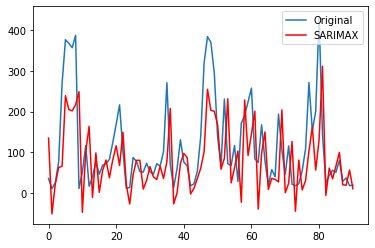

In [60]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend()